Connecting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing libraries for creating embeddings

In [ ]:
from keras.applications.inception_v3 import preprocess_input
import pickle 
import numpy as np
import keras
from keras.applications import InceptionV3
import os

Download and unzip COCO training and validation set. Make sure to remove the zip files after extraction to save space.

In [ ]:
!wget http://images.cocodataset.org/zips/train2014.zip

--2022-11-07 00:57:50--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.7.164
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.7.164|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  56.6MB/s    in 3m 50s  

2022-11-07 01:01:40 (56.0 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip

--2022-11-07 01:05:40--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.171.249
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.171.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  52.4MB/s    in 1m 57s  

2022-11-07 01:07:37 (54.3 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
!unzip train2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2014/COCO_train2014_000000408557.jpg  
 extracting: train2014/COCO_train2014_000000013714.jpg  
 extracting: train2014/COCO_train2014_000000194043.jpg  
 extracting: train2014/COCO_train2014_000000219859.jpg  
 extracting: train2014/COCO_train2014_000000278135.jpg  
 extracting: train2014/COCO_train2014_000000141015.jpg  
 extracting: train2014/COCO_train2014_000000280923.jpg  
 extracting: train2014/COCO_train2014_000000200024.jpg  
 extracting: train2014/COCO_train2014_000000435713.jpg  
 extracting: train2014/COCO_train2014_000000249993.jpg  
 extracting: train2014/COCO_train2014_000000424160.jpg  
 extracting: train2014/COCO_train2014_000000142761.jpg  
 extracting: train2014/COCO_train2014_000000532668.jpg  
 extracting: train2014/COCO_train2014_000000564904.jpg  
 extracting: train2014/COCO_train2014_000000346384.jpg  
 extracting: train2014/COCO_train2014_000000560934.jpg  
 extracting: train2014/COCO_train2014

In [ ]:
!unzip val2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2014/COCO_val2014_000000535608.jpg  
 extracting: val2014/COCO_val2014_000000279145.jpg  
 extracting: val2014/COCO_val2014_000000243495.jpg  
 extracting: val2014/COCO_val2014_000000225791.jpg  
 extracting: val2014/COCO_val2014_000000428067.jpg  
 extracting: val2014/COCO_val2014_000000059383.jpg  
 extracting: val2014/COCO_val2014_000000558498.jpg  
 extracting: val2014/COCO_val2014_000000376123.jpg  
 extracting: val2014/COCO_val2014_000000191304.jpg  
 extracting: val2014/COCO_val2014_000000171062.jpg  
 extracting: val2014/COCO_val2014_000000014549.jpg  
 extracting: val2014/COCO_val2014_000000121152.jpg  
 extracting: val2014/COCO_val2014_000000276596.jpg  
 extracting: val2014/COCO_val2014_000000029431.jpg  
 extracting: val2014/COCO_val2014_000000036349.jpg  
 extracting: val2014/COCO_val2014_000000502055.jpg  
 extracting: val2014/COCO_val2014_000000438848.jpg  
 extracting: val2014/COCO_val2014_000000364973.j

In [ ]:
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /content


In [ ]:
from keras.utils import load_img,img_to_array
import os
# inception model is loaded
img_model = InceptionV3(include_top=False)
# parameter to make it 1 dimensional feature 
img_model = keras.engine.training.Model(img_model.inputs, keras.layers.GlobalAveragePooling2D()(img_model.output))

data_dir = os.listdir('train2014/')
print(len(data_dir))
imgs = []
file_names = []

for filename in data_dir[:5000]:
  # read image
  image = load_img('train2014/'+filename, target_size=(229, 229))
  # image to num py
  image = img_to_array(image)
 
  imgs.append(image)
  file_names.append(filename)
  
batch_image = np.array(imgs)



image = preprocess_input(batch_image)
#predictions model
pred = img_model.predict(batch_image)
print(pred.shape)
with open('/content/gdrive/MyDrive/NLP_model/train_img_embeds.pickle', 'wb') as f:
    pickle.dump(pred, f)
with open('/content/gdrive/MyDrive/NLP_model/train_img_fns.pickle','wb') as f:
  pickle.dump(file_names,f)

82783
157/157 [==============================] - 21s 65ms/step
(5000, 2048)


In [ ]:
from keras.utils import load_img,img_to_array
# for val dataset similar steps as for training in prvious cell
import os
data_dir = os.listdir('val2014/')
print(len(data_dir))
imgs = []
file_names = []
for filename in data_dir[:5000]:
  
    image = load_img('val2014/'+filename, target_size=(229, 229))
    
    image = img_to_array(image)
    imgs.append(image)
    file_names.append(filename)
  
batch_image = np.array(imgs)


image = preprocess_input(batch_image)

pred = img_model.predict(batch_image)
print(pred.shape)
with open('/content/gdrive/MyDrive/NLP_model/val_img_embeds.pickle', 'wb') as f:
    pickle.dump(pred, f)
with open('/content/gdrive/MyDrive/NLP_model/val_img_fns.pickle','wb') as f:
  pickle.dump(file_names,f)

40504


In [ ]:
import numpy as np
#import tensorflow as tf 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import keras.backend as K
import keras.layers as L
import keras
from collections import defaultdict, Counter
import json
import pickle
import os
from nltk.tokenize import RegexpTokenizer
from skimage.io import imread
from skimage.transform import resize

%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
!gdown 1PmDHSkd50Zy1VYVS-uIHr9T_jTWvbynF
!gdown 1ScBD6GoDkE1pGy9RC1J-SR-eGQHCGGHI
!gdown 1-0Acd7hXEI3Rs8J8FzxHNNATTD4EQZzD
!gdown 1-0bgVSJXG5WaBpuMfK4buhA0muOT-YaH

Downloading...
From: https://drive.google.com/uc?id=1PmDHSkd50Zy1VYVS-uIHr9T_jTWvbynF
To: /content/train_img_embeds.pickle
100% 41.0M/41.0M [00:00<00:00, 134MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ScBD6GoDkE1pGy9RC1J-SR-eGQHCGGHI
To: /content/train_img_fns.pickle
100% 204k/204k [00:00<00:00, 78.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0Acd7hXEI3Rs8J8FzxHNNATTD4EQZzD
To: /content/val_img_embeds.pickle
100% 41.0M/41.0M [00:00<00:00, 132MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0bgVSJXG5WaBpuMfK4buhA0muOT-YaH
To: /content/val_img_fns.pickle
100% 194k/194k [00:00<00:00, 73.8MB/s]


In [ ]:
# load training image features
#with open('/content/gdrive/MyDrive/NLP_model/train_img_embeds.pickle', 'rb') as f:
with open('/content/train_img_embeds.pickle', 'rb') as f:  
    train_img_x = pickle.load(f)
# load the image file names
#with open('/content/gdrive/MyDrive/NLP_model/train_img_fns.pickle', 'rb') as f:
with open('/content/train_img_fns.pickle', 'rb') as f:
    train_img_fn = pickle.load(f)
    
# load validation image features
#with open('/content/gdrive/MyDrive/NLP_model/val_img_embeds.pickle', 'rb') as f:
with open('/content/val_img_embeds.pickle', 'rb') as f:
    val_img_x = pickle.load(f)
# load the validation image filenames
#with open('/content/gdrive/MyDrive/NLP_model/val_img_fns.pickle', 'rb') as f:
with open('/content/val_img_fns.pickle', 'rb') as f:  
    val_img_fn = pickle.load(f)
    
print('Training: ', (train_img_x.shape, len(train_img_fn)))
print('Validation: ', (val_img_x.shape, len(val_img_fn)))

Training:  ((5000, 2048), 5000)
Validation:  ((5000, 2048), 5000)


In [ ]:
print(train_img_fn[1:3])
print()
print(train_img_x[1:5,:])

['COCO_train2014_000000547164.jpg', 'COCO_train2014_000000337833.jpg']

[[0.10668169 0.52928764 0.19711378 ... 0.39156437 0.84154487 0.44274607]
 [1.3313005  0.1351636  0.49889424 ... 0.01447678 0.5691992  0.13351454]
 [1.0114474  0.45660126 1.5430691  ... 0.27938977 1.5823056  0.8808092 ]
 [0.14798701 0.5509804  0.21521527 ... 0.03405381 0.8089885  0.5779571 ]]


In [ ]:
'''
    loads captions for images
'''
def load_captions(filename, img_fn):
    '''
    img_fnames: img file names
    filename: complete address of json file to load
    '''
    
    # load the json annotations file
    # ann contains three keys: info, images, licenses, annotations
    # info: contains info about image, its fullname name, id, h, w , url
    # annotations: caption, id, image_id
    with open(filename, 'r') as f:
        annotate = json.load(f)
        
    # we already have a list of image file names, so we make another
    # list which contains the captions for those images, each image has atleast 5
    # captions or more
    
    # mapping from img filename to img id
    fn_id = {d['file_name']:d['id'] for d in annotate['images']}
    
    # we first make a dict mapping for img file id to captions
    id_cap = defaultdict(list)
    for d in annotate['annotations']:
        id_cap[d['image_id']].append(d['caption'])
    
    # for storing the captions
    captions = []
    
    # make the caption list
    for file_name in img_fn:
        captions.append(id_cap[fn_id[file_name]])    
    
    return captions, {fname:id_cap[fn_id[fname]] for fname in fn_id.keys()}

Loading the captions

In [ ]:
!wget http://images.cocodataset.org/zips/Train\/\Val annotations.zip

--2022-11-07 00:55:48--  http://images.cocodataset.org/zips/Train/Val
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.239.19
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.239.19|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-11-07 00:55:48 ERROR 404: Not Found.

--2022-11-07 00:55:48--  http://annotations.zip/
Resolving annotations.zip (annotations.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘annotations.zip’


In [ ]:
!gdown 1rvapSQzMD2aaPlF7hGl4YTkNN5TjSeb6
!gdown 1ut8bozZ5t3rd3pxCMKa7jrjyd_agJWRs

Downloading...
From: https://drive.google.com/uc?id=1rvapSQzMD2aaPlF7hGl4YTkNN5TjSeb6
To: /content/captions_val2014[1].json
100% 32.4M/32.4M [00:00<00:00, 226MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ut8bozZ5t3rd3pxCMKa7jrjyd_agJWRs
To: /content/captions_train2014[1].json
100% 66.8M/66.8M [00:00<00:00, 144MB/s]


In [ ]:
train_cap, train_fn_cap = load_captions('/content/captions_train2014[1].json', train_img_fn)
#train_cap, train_fn_cap = load_captions('/content/gdrive/MyDrive/NLP_model/captions_train2014[1].json', train_img_fn)
print(len(train_cap))
val_cap, val_fn_cap = load_captions('/content/captions_val2014[1].json', val_img_fn)
#val_cap, val_fn_cap = load_captions('/content/gdrive/MyDrive/NLP_model/captions_val2014[1].json', val_img_fn)
print(len(val_cap))

5000
5000


In [ ]:
train_cap[0]

['A man in a diving suit carrying a surfboard.',
 'A man holding a surfboard, walking into the ocean.',
 'A man in a wet suite walking out in to the surf with a surfboard. ',
 'Man in a wetsuit taking his surfboard into the sea.',
 'An athlete carrying a surf board is walking into the water.']

82783 40504


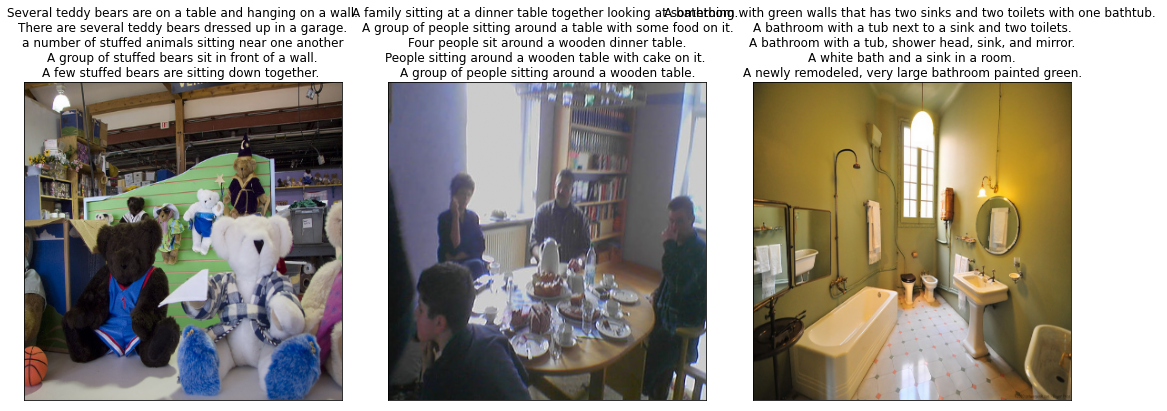

In [ ]:
# for visualizing training data
f_train = os.listdir('train2014/')
f_val = os.listdir('val2014/')
print(len(f_train), len(f_val))

# training example
fig = plt.figure(figsize=(15,15))
for i in range(3):
    img = imread('train2014/' + f_train[i])
    img = resize(img, (350,350))
    fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plt.tight_layout()
    plt.imshow(img)
    plt.title('\n'.join(train_fn_cap[f_train[i]]))
plt.show()

In [ ]:
'''
    Builds vocabulary dict
'''
def create_text_utils(captions):
    
    # make list of unique tokens
    word_freq = Counter((' '.join([sent for capt_i in captions for sent in capt_i ])).split())
    # keep only top 6000 words 
    word_freq = word_freq.most_common(8000)
    
    # vocabulary list
    vocab,_ = list(zip(*word_freq))
    vocab = ['<UNK>','<PAD>','<EOS>','<START>'] + list(vocab)
    
    # make a vocabulary dictionary: word to index
    word_to_idx = defaultdict(int, {word:i for i,word in tqdm(enumerate(vocab))})
    
    # reverse dict
    idx_to_word = {word_to_idx[key]:key for key in word_to_idx.keys()}
    
    return word_to_idx, idx_to_word

In [ ]:
# create the necessary mappings
word_to_idx, idx_to_word = create_text_utils(train_cap)

8004it [00:00, 974802.09it/s]


In [ ]:
# tokenizes the captions
def tokenize_captions(captions):
    # tokenize the sentences
    word_tokenizer = RegexpTokenizer(r'\w+')
    
    # tokenize captions
    captions_tokenized = []
    for i in range(len(captions)):
        captions_tokenized.append([])
        for j in range(len(captions[i])):
            captions_tokenized[i].append(word_tokenizer.tokenize(captions[i][j].lower()))
    
    return captions_tokenized

In [ ]:
# tokenize captions
train_cap = tokenize_captions(train_cap)

In [ ]:
# converts the string captions to its index representation and pads the caption
# if the size of a particular caption is less than the max length
def convert_to_num(captions, word_to_idx):
    
    # words to indices
    word_idx = []
    for i in range(len(captions)):
        word_idx.append([])
        for sent in captions[i]:
            word_idx[i].append([word_to_idx['<START>']] + [word_to_idx[word]
                                                           for word in sent] +
                              [word_to_idx['<EOS>']])
    
    return np.array(word_idx)

In [ ]:
# adds padding to the numerical representaion of captions
# all the captions of all the examples in the arg batch are padded according to 
# the longest caption in the batch
def add_padding(word_idx):
    '''
        word_idx: (list(list)) list containing captions in indexed form as list.
    '''
    # find the maximum length amongst all the captions
    max_len = -99999999
   
    max_len = max(map(len, word_idx))
    
    # Padded representation
    pad = np.empty((len(word_idx), max_len), dtype='int32')
    pad.fill(word_to_idx[''])
    
    for i in range(len(word_idx)):
        #print(word_idx[i])
        pad[i,:len(word_idx[i])] = word_idx[i]
    
    return np.array(pad)

In [ ]:
# convert the training captions to numerical index representation
train_cap = convert_to_num(train_cap, word_to_idx)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
train_cap[0]

[[3, 4, 13, 8, 4, 2592, 277, 281, 4, 178, 2],
 [3, 4, 13, 24, 4, 178, 54, 132, 9, 321, 2],
 [3, 4, 13, 8, 4, 600, 2959, 54, 87, 8, 14, 9, 253, 10, 4, 178, 2],
 [3, 13, 8, 4, 1206, 187, 32, 178, 132, 9, 1398, 2],
 [3, 20, 2960, 281, 4, 253, 127, 12, 54, 132, 9, 86, 2]]

In [ ]:
add_padding(train_cap[0])

array([[   3,    4,   13,    8,    4, 2592,  277,  281,    4,  178,    2,
           0,    0,    0,    0,    0,    0],
       [   3,    4,   13,   24,    4,  178,   54,  132,    9,  321,    2,
           0,    0,    0,    0,    0,    0],
       [   3,    4,   13,    8,    4,  600, 2959,   54,   87,    8,   14,
           9,  253,   10,    4,  178,    2],
       [   3,   13,    8,    4, 1206,  187,   32,  178,  132,    9, 1398,
           2,    0,    0,    0,    0,    0],
       [   3,   20, 2960,  281,    4,  253,  127,   12,   54,  132,    9,
          86,    2,    0,    0,    0,    0]], dtype=int32)

In [ ]:
## find the length of longest caption 
max_len = -999999
for i in range(len(train_cap)):
    curr_max = max(map(len, train_cap[i]))
    max_len = max(max_len, curr_max)
print(max_len)

51


Model hyperparameters

In [ ]:
# no. of hidden state units
STATE_SIZE = 300
# dimension of word embedding to produce
WORD_EMBED_SIZE = 128
# dimension of encoding vector
IMG_ENC_SIZE = train_img_x.shape[1]
# batch size
BATCH_SIZE=512
# no. of batches to produce for 1 epoch
STEPS_PER_EPOCH = len(train_img_x)/BATCH_SIZE
# length of vocabulary
VOCAB_LEN = len(word_to_idx)
STEPS_PER_EPOCH

9.765625

data generator

In [ ]:
'''
    for generating random batches for model training
    train_img_x: numpy array containing img encoding values of shape(2048) for m examples
    train_cap: list of list ,training captions with each caption represented as 
                list of indices of the corresponding word
'''
def generate_model_batch(batch_size=BATCH_SIZE):
    while True:
        # pick out random indices for the batch
        indices = np.random.choice(len(train_img_x), batch_size, replace=False)
        # get the random batch of images
        batch_img_x = train_img_x[indices]
        # get the random batch of training captions
        # Since each image has atleast 5 captions, so we select randomly one each time
        batch_captions = [train_cap[idx][np.random.randint(5)] for idx in indices ]
        # now we pad the captions to equal length

        batch_captions = add_padding(batch_captions)

        # now the model gets two inputs: image encodings and captions
        # the output is captions shifted by one timestep
        # so to make things easier we send them as dict
        train_x = {
            'decoder_input': batch_captions[:, :-1],
            'hidden_state_input': batch_img_x
        }

        train_y = {
            'decoder_output': batch_captions[:, 1:]
        }

        yield (train_x, train_y)

In [ ]:
data_generator = generate_model_batch(batch_size=BATCH_SIZE)

In [ ]:
# check out the generated content
batch = next(data_generator)
batch_x = batch[0]
batch_y = batch[1]
print(batch_x)
print()
print(batch_y)

{'decoder_input': array([[  3, 116, 143, ...,   1,   1,   1],
       [  3,   4, 112, ...,   1,   1,   1],
       [  3,   4,  66, ...,   1,   1,   1],
       ...,
       [  3,   4,  21, ...,   1,   1,   1],
       [  3,   4,  60, ...,   1,   1,   1],
       [  3,   4,  23, ...,   1,   1,   1]], dtype=int32), 'hidden_state_input': array([[0.4772249 , 0.35912442, 0.25783074, ..., 0.        , 0.3060254 ,
        0.00356633],
       [0.42447647, 0.12774585, 1.8202786 , ..., 0.41971225, 0.10900644,
        0.0992275 ],
       [0.39776513, 0.07889529, 0.92657685, ..., 0.01283599, 0.1697133 ,
        3.367085  ],
       ...,
       [0.31966424, 0.05977552, 0.31809342, ..., 0.04671789, 0.02104619,
        0.5318235 ],
       [0.4538414 , 0.00524856, 0.10232083, ..., 1.0241046 , 1.1045309 ,
        0.7449875 ],
       [0.2783869 , 0.40791053, 0.3614115 , ..., 0.26212218, 0.80947584,
        1.1066228 ]], dtype=float32)}

{'decoder_output': array([[116, 143, 539, ...,   1,   1,   1],
       [  4,

In [ ]:
from keras.layers import Input, Embedding, Dense, LSTM, GRU
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.utils import load_img, img_to_array

In [ ]:
# for taking the image encodings
hidden_state_input = Input(shape=(IMG_ENC_SIZE,), name='hidden_state_input')

# for converting the image encodings to desirable size matching the
# no. of LSTM hidden units
hidden_state_values = Dense(STATE_SIZE, activation='tanh',
                           name='hidden_state_values')

# for taking the captions as input
# None for the shape means that the length is not fixed for the captions
decoder_input = Input(shape=(None, ), name='decoder_input')

# For getting the embeddings out of captions
embedding_layer = Embedding(input_dim=VOCAB_LEN, output_dim=WORD_EMBED_SIZE,
                           name='embedding_layer')

# We will be using two layered LSTM network
# each layer needs to return the output sequence for the next layer stack
lstm_layer1 = LSTM(STATE_SIZE, name='lstm_layer1', return_sequences=True)
lstm_layer2 = LSTM(STATE_SIZE, name='lstm_layer2', return_sequences=True)

# the final output of the LSTM layer will pass through a dense layer
# Instead of using softmax loss, which would require the ground truth labels
# to be represented in One hot representation of length equal to vocabulary size, 
# we can use the sparse entropy loss, which internally converts the labels for 
# computing the loss, for that we need to write a custom loss, as the keras implementation 
# has bug issues with that.
decoder_dense_output = Dense(VOCAB_LEN, activation='linear', name='decoder_output')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# add captions as input
caption_input = decoder_input
# connect embedding layer
caption_embeds = embedding_layer(caption_input)
# Initial hidden state
hidden_ini_states = hidden_state_values(hidden_state_input)

# pass the embeddings to the LSTM network
lstm1 = lstm_layer1(caption_embeds, initial_state=[hidden_ini_states,hidden_ini_states])
lstm2 = lstm_layer2(lstm1, initial_state=[hidden_ini_states,hidden_ini_states])

# pass the lstm output to dense layer
decoder_output = decoder_dense_output(lstm2)

# create keras model instance
model = Model(inputs=[hidden_state_input, decoder_input], 
                     outputs=[decoder_output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 decoder_input (InputLayer)     [(None, None)]       0           []                               
                                                                                                  
 hidden_state_input (InputLayer  [(None, 2048)]      0           []                               
 )                                                                                                
                                                                                                  
 embedding_layer (Embedding)    (None, None, 128)    1338880     ['decoder_input[0][0]']          
                                                                                                  
 hidden_state_values (Dense)    (None, 300)          614700      ['hidden_state_input[0][0]'] 

In [ ]:
'''
    Computes cross entropy loss between true labels(y_true) and predicted labels(y_pred)
'''
def sparse_cross_entropy(y_true, y_pred):
    
    # computes loss and outputs [batch_size, sequence_length] tensor
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true,
                                                         logits=y_pred)
    mean_loss = tf.reduce_mean(loss)
    
    return mean_loss

In [ ]:
def binary_crossentropy(y_true, y_pred):
    return K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)

In [ ]:
#tf.disable_v2_behavior() 
tf.config.run_functions_eagerly(False)
tf.compat.v1.disable_eager_execution()

Model Training

In [ ]:
# optimizer for the model
optimizer = RMSprop(lr=1e-3)

# for saving the weights 
checkpoint = ModelCheckpoint('checkpoint.keras', verbose=1,
                             save_weights_only=True)

# output dimensions for the model
# (bacth_size, arbitary sequence_length)
#issue
model_target = tf.placeholder(shape=(None, None), dtype='int32')
#model_target = tf.Variable(tf.ones(shape=(0, 0)), dtype='float32')
tf.config.run_functions_eagerly(False)
# compile the model with all this info
model.compile(optimizer=optimizer, loss=sparse_cross_entropy, target_tensors=[model_target])
#model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy', target_tensors=[model_target] ,
#              metrics=['accuracy'])
# metrics=['mae'])
          #    metrics=['mse', 'mae', 'mape'])
#model.add_metric(tf.keras.metrics.Mean(name='mean_1'))
#model.compile(optimizer='sgd', loss='mse', target_tensors=[model_target], metrics=[tf.keras.metrics.Hinge()])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# load if model is found
#file_path = '/content/gdrive/MyDrive/NLP_model/checkpoint.keras'
file_path = '/content/checkpoint.keras'
try:
    model.load_weights(file_path)
    print('Model weights loaded successfully')
except :
    print("Error !!.")

Error !!.


In [ ]:

#hist = model.fit(generate_model_batch(batch_size=BATCH_SIZE), steps_per_epoch=STEPS_PER_EPOCH, epochs=100, verbose=1,callbacks=[checkpoint])

hist = model.fit_generator(generator=generate_model_batch(batch_size=BATCH_SIZE),
                   steps_per_epoch=STEPS_PER_EPOCH,
                   epochs=500, verbose=1, 
                   callbacks=[checkpoint])


Epoch 1/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


10/9 [==============================] - ETA: 0s - batch: 4.5000 - size: 512.0000 - loss: 5.2347
Epoch 1: saving model to checkpoint.keras
9/9 [==============================] - 5s 230ms/step - batch: 4.5000 - size: 512.0000 - loss: 5.2347
Epoch 2/500
10/9 [==============================] - ETA: 0s - batch: 4.5000 - size: 512.0000 - loss: 2.4602
Epoch 2: saving model to checkpoint.keras
9/9 [==============================] - 2s 228ms/step - batch: 4.5000 - size: 512.0000 - loss: 2.4602
Epoch 3/500
10/9 [==============================] - ETA: 0s - batch: 4.5000 - size: 512.0000 - loss: 2.5038
Epoch 3: saving model to checkpoint.keras
9/9 [==============================] - 2s 203ms/step - batch: 4.5000 - size: 512.0000 - loss: 2.5038
Epoch 4/500
10/9 [==============================] - ETA: 0s - batch: 4.5000 - size: 512.0000 - loss: 2.3669
Epoch 4: saving model to checkpoint.keras
9/9 [==============================] - 2s 203ms/step - batch: 4.5000 - size: 512.0000 - loss: 2.3669
Epoch 5/

In [ ]:
#hist = model.fit(batch_x, steps_per_epoch=STEPS_PER_EPOCH, epochs=20)

Results

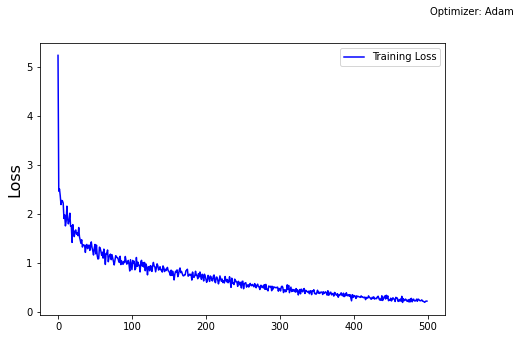

In [ ]:
# loss plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.suptitle('Optimizer: Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# load the pretrained inception model in keras
image_model = InceptionV3(include_top=False)
image_model = keras.engine.training.Model(image_model.inputs,
                                          keras.layers.GlobalAveragePooling2D()
                                          (image_model.output))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
'''
    Load and encode the input image 
'''
def encode_image(file_name=None, path=True, img=None):
    # load and resize the image only when the path is provided
    if path:
        # read image
        img = load_img(file_name, target_size=(229, 229))
        # convert to numpy array
        img = img_to_array(img)
    
    # add another dimension that can act as the batch size 
    img = np.expand_dims(img, axis=0)
    # preprocess image
    img = preprocess_input(img)
    # get the model predictions
    pred = image_model.predict(img)
    
    return pred

In [ ]:
"""
    Generates caption for the input image
"""
def generate_caption(image_path=None, max_tokens=35, path=True, img=None):
    
    # predicted caption for the input image
    caption = []
    # starting token
    curr_token = word_to_idx['<START>']
    # counter for the no. of words sampled
    token_counter = 0
    # <EOS> token index
    eos = word_to_idx['<EOS>']
    
    # if image path is provided
    if path == True:
        # get image encodings
        img_x = encode_image(file_name=image_path, path=True, img=None)
    else:
        # get image encodings
        img_x = encode_image(file_name=None, path=False, img=img)
        
    # dummy numpy array to feed to the model
    model_input_caption = np.empty(shape=(1, max_len), dtype='int32')
    # fill the input with padding
    model_input_caption.fill(word_to_idx['PAD'])

    # We will produce the caption by sampling. We start by feeding it <START> and the predicted
    # output word is then used as input for the next timestep. 
    # We do this till max_len is reached or <EOS> is encountered
    
    while curr_token != eos and token_counter < max_len:
        # For each word we feed the model the entire predicted sequence up till then
        # add the current token index in decoder input 
        model_input_caption[0, token_counter] = curr_token
        
        X = {
            'hidden_state_input': img_x,
            'decoder_input': model_input_caption
        }
        
        # predict the word 
        model_output = model.predict(X)
        
        # Since the output is One hot encoded, we pick the hot index 
        # get the current predicted word from one hot encoded output for the current timestep
        curr_token = np.argmax(model_output[0, token_counter, :])

        # add the currently predicted word
        caption.append(curr_token)

        token_counter += 1
         # check if last word is <EOS>
    if caption[-1] == eos:
        # remove the last <EOS> tag
        caption = caption[:-1]
    
    # convert the indices to words
    caption_word = [idx_to_word[idx] for idx in caption]
    
    return ' '.join(caption_word)

In [ ]:
!python -m spacy download en_core_web_md


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 2.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')

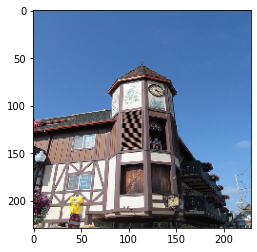

Predicted caption:


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


a large red building with a clock and enclosure
Annotation:
a clock on the top of a small tower on the top of a building
similarity:
0.8504721162000618



In [ ]:
files_val = os.listdir('val2014/')
idx = np.random.randint(len(files_val))
filename = files_val[idx]
val_fn_cap[files_val[idx]]
# read the image
img = load_img('val2014/'+filename, target_size=(229, 229))

# Plot the image.
plt.imshow(img)
plt.show()

# Print the predicted caption.
print("Predicted caption:")
output_text = generate_caption(image_path='val2014/'+filename, path=True, img=None)
print(output_text)
print("Annotation:")
annotation = val_fn_cap[f_val[idx]][0]
print(annotation)
print("similarity:")
print(nlp(output_text).similarity(nlp(annotation)))
print()

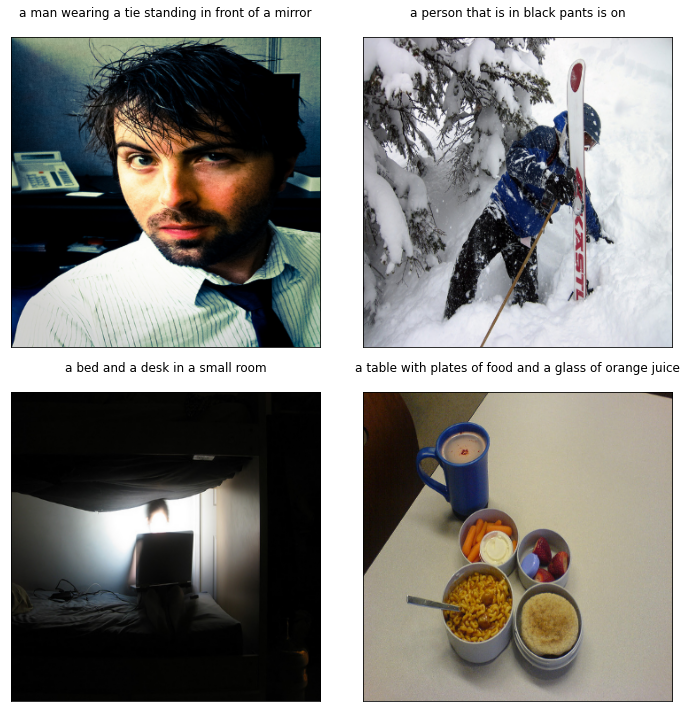

In [ ]:
# for visualizing validation data
files_val = os.listdir('val2014/')

# Plot the validation images
fig = plt.figure(figsize=(10,10))
for i in range(4):
    img = imread('val2014/' + files_val[i])
    img = resize(img, (350,350))
    fig.add_subplot(2, 2, i + 1, xticks=[], yticks=[])
    plt.tight_layout()
    plt.imshow(img)
    output_text = generate_caption(image_path='val2014/' + files_val[i], path=True, img = None)
    plt.title(output_text+'\n')
    
plt.show()

In [ ]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

In [ ]:

files_val = os.listdir('val2014/')
sent_sim = []
prediction = []
out = display(progress(0, 100), display_id=True)
for i in range(5000):
  img = imread('val2014/' + files_val[i])
  img = resize(img, (350,350))
  output_text = generate_caption(image_path='val2014/' + files_val[i], path=True, img = None)
  annotation = val_fn_cap[files_val[i]][0]
  s = nlp(output_text).similarity(nlp(annotation))
  sent_sim.append(s)
  if s > 0.85:
    prediction.append(1)
  else :
    prediction.append(0)
  time.sleep(0.02)
  out.update(progress(i, 5000))

In [ ]:
print(prediction)

[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 

In [ ]:
print('accuracy:',(sum(prediction)/5000)*100)

accuracy: 27.639999999999997
